# Plotly

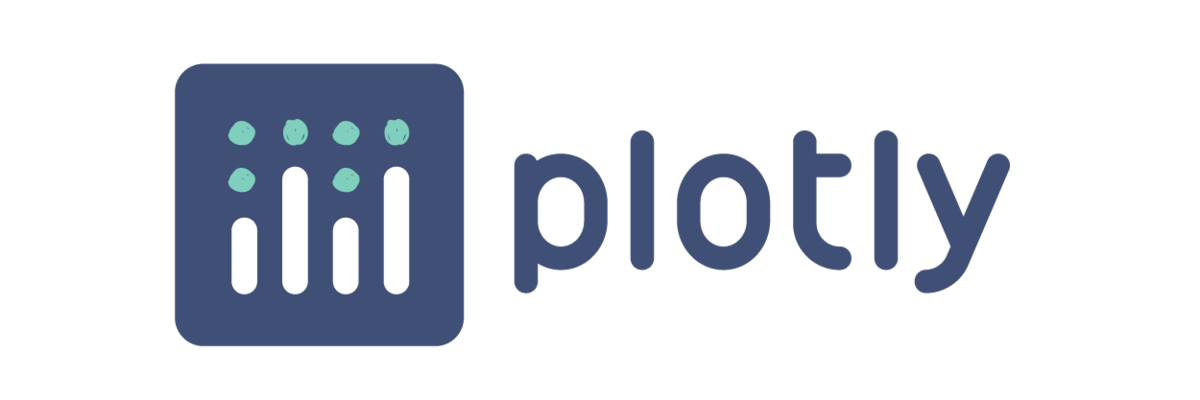

Gráficos interativos.

https://plotly.com/python/

In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

#### Dados: Cotação do Bitcoin

Fonte: https://www.kaggle.com/mczielinski/bitcoin-historical-data

CSV files for select bitcoin exchanges for the time period of Jan 2012 to September 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time.

In [2]:
cotacao_bitcoin = pd.read_csv('https://github.com/ftorresd/OCEAN-datasets/raw/main/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')

In [3]:
cotacao_bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1530090780,6072.61,6079.20,6071.09,6079.20,0.114733,697.021866,6075.138707
1,1530090840,6078.91,6078.91,6072.65,6078.77,0.636750,3866.991974,6073.010480
2,1530090900,6071.63,6079.20,6071.58,6079.20,0.728314,4427.390032,6078.957579
3,1530090960,6072.54,6075.00,6072.54,6075.00,8.616652,52342.829039,6074.613189
4,1530091020,6072.85,6075.00,6072.84,6075.00,4.704207,28575.129404,6074.378005


In [4]:
cotacao_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165848 entries, 0 to 1165847
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1165848 non-null  int64  
 1   Open               1123360 non-null  float64
 2   High               1123360 non-null  float64
 3   Low                1123360 non-null  float64
 4   Close              1123360 non-null  float64
 5   Volume_(BTC)       1123360 non-null  float64
 6   Volume_(Currency)  1123360 non-null  float64
 7   Weighted_Price     1123360 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 71.2 MB


In [5]:
cotacao_bitcoin.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.165848e+06,1.123360e+06,1.123360e+06,1.123360e+06,1.123360e+06,1.123360e+06,1.123360e+06,1.123360e+06
mean,1.565066e+09,7.636446e+03,7.640622e+03,7.632323e+03,7.636370e+03,6.011050e+00,4.544430e+04,7.636637e+03
std,2.019309e+07,2.365610e+03,2.367290e+03,2.363978e+03,2.365523e+03,1.679835e+01,1.342262e+05,2.365775e+03
min,1.530091e+09,3.124450e+03,3.131860e+03,3.122280e+03,3.124450e+03,1.000000e-08,3.402300e-05,3.124043e+03
25%,1.547578e+09,6.276010e+03,6.278980e+03,6.273467e+03,6.276000e+03,2.495704e-01,1.809451e+03,6.276000e+03
50%,1.565066e+09,7.760310e+03,7.766215e+03,7.755400e+03,7.760105e+03,1.388375e+00,1.000042e+04,7.760478e+03
75%,1.582554e+09,9.432833e+03,9.437345e+03,9.428560e+03,9.432840e+03,5.259298e+00,3.784621e+04,9.433249e+03
max,1.600042e+09,1.385325e+04,1.388000e+04,1.383006e+04,1.385057e+04,1.098349e+03,1.044599e+07,1.384152e+04


Convertendo Timestamp para data.

In [6]:
cotacao_bitcoin['date'] = pd.to_datetime(cotacao_bitcoin['Timestamp'], unit='s')
cotacao_bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1530090780,6072.61,6079.20,6071.09,6079.20,0.114733,697.021866,6075.138707,2018-06-27 09:13:00
1,1530090840,6078.91,6078.91,6072.65,6078.77,0.636750,3866.991974,6073.010480,2018-06-27 09:14:00
2,1530090900,6071.63,6079.20,6071.58,6079.20,0.728314,4427.390032,6078.957579,2018-06-27 09:15:00
3,1530090960,6072.54,6075.00,6072.54,6075.00,8.616652,52342.829039,6074.613189,2018-06-27 09:16:00
4,1530091020,6072.85,6075.00,6072.84,6075.00,4.704207,28575.129404,6074.378005,2018-06-27 09:17:00
...,...,...,...,...,...,...,...,...,...
1165843,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779,2020-09-13 23:56:00
1165844,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396,2020-09-13 23:57:00
1165845,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283,2020-09-13 23:58:00
1165846,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651,2020-09-13 23:59:00


### Cotação de abertura.

In [7]:
# # configure_plotly_browser_state() # truque para o Plotly funcionar no Google Colab

# open = go.Scatter(x = cotacao_bitcoin['date'],
#                     y = cotacao_bitcoin['Open'],
#                     mode = 'markers',
#                     name = 'Abertura')

# # fig = go.Figure( open )
# # fig.show()
# # fica muito pesado pois pega em minutos desde 2012, não funciona

#### O que aconteceu?
Muitos dados!

#### Agrupando dados

Por dia:

In [8]:
buffer = cotacao_bitcoin.groupby((cotacao_bitcoin.index // (60*24))).first()


In [9]:
open = go.Scatter(x = buffer['date'],
                    y = buffer['Open'],
                    mode = 'lines+markers',
                    name = 'Abertura')

fig = go.Figure( open )
fig.show()